# Home work #8

## Тема “Обучение без учителя”

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings

In [2]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [3]:
boston = load_boston()

X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston.target, columns=["price"])

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000
mean,3.609,11.569,10.985,0.072,0.556,6.316,68.556,3.808,9.356,404.032,18.318,356.278,12.457
std,8.875,23.152,6.895,0.258,0.118,0.709,27.995,2.131,8.590,166.173,2.229,91.567,7.110
min,0.009,0.000,0.740,0.000,0.385,3.863,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.081,0.000,5.130,0.000,0.452,5.891,45.550,2.088,4.000,279.000,16.800,375.472,6.772
50%,0.261,0.000,8.560,0.000,0.538,6.210,77.700,3.176,5.000,330.000,18.700,391.305,10.925
75%,3.203,20.000,18.100,0.000,0.631,6.637,93.650,5.401,12.000,666.000,20.200,395.755,16.373
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


In [8]:
col_names = X_train.columns

In [9]:
scaler = StandardScaler()

In [10]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=col_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns=col_names)

In [11]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.406,-0.500,-1.488,-0.278,-1.459,-3.462,-2.348,-1.258,-0.974,-1.308,-2.569,-3.892,-1.511
25%,-0.398,-0.500,-0.850,-0.278,-0.889,-0.600,-0.823,-0.808,-0.624,-0.753,-0.682,0.210,-0.801
50%,-0.378,-0.500,-0.352,-0.278,-0.157,-0.149,0.327,-0.297,-0.508,-0.446,0.171,0.383,-0.216
75%,-0.046,0.365,1.033,-0.278,0.634,0.453,0.897,0.748,0.308,1.578,0.845,0.432,0.551
max,9.631,3.824,2.433,3.596,2.675,3.478,1.125,3.908,1.707,1.850,1.654,0.444,3.593


In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

print(f'До:\t{X_train.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


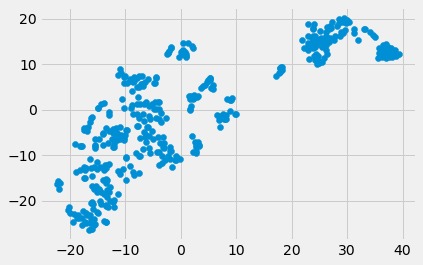

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [14]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [15]:
train_labels = model.fit_predict(X_train)

print(train_labels)

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


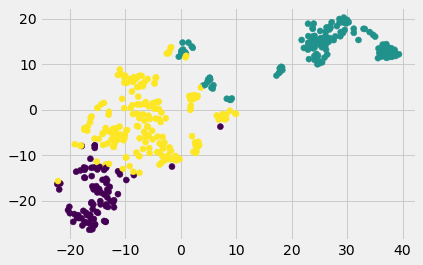

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [17]:
X_train['labels'] = train_labels
y_train['labels'] = train_labels

In [18]:
y_train.groupby(['labels']).mean().price

labels
0   27.788
1   16.165
2   24.958
Name: price, dtype: float64

In [19]:
X_train.groupby(['labels']).mean().CRIM

labels
0   -0.399
1    0.811
2   -0.360
Name: CRIM, dtype: float64